In [ ]:
!pip install sklearn
!pip install underthesea
!pip install langdetect
!pip install wordcloud

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=6bd43c6f9716a24988cfd42b2d73bfd9628a9d615a25d5da90fcb39926cf

In [ ]:
import sklearn
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex
import re
import string
import time

from langdetect import detect
from collections import Counter
from underthesea import word_tokenize, pos_tag, sent_tokenize

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
file_path = '/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/Data_Agoda_raw/hotel_comments.csv'

## Đọc dữ liệu

In [ ]:
data = pd.read_csv(file_path, encoding="utf-8")

In [ ]:
pd.set_option('display.max_colwidth', None)  # Hiển thị toàn bộ nội dung cột

In [ ]:
data.head(5)

,num,Hotel ID,Reviewer ID,Reviewer Name,Nationality,Group Name,Room Type,Stay Details,Score,Score Level,Title,Body,Review Date
0,1,1_1,1_1_1,MARIKO,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 3 đêm vào Tháng 7 năm 2023,"10,0",Trên cả tuyệt vời,Cao nhất‼︎”,Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên ...,Đã nhận xét vào 30 tháng 7 2023
1,2,1_1,1_1_2,Hong,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,Đã ở 1 đêm vào Tháng 9 năm 2022,"10,0",Trên cả tuyệt vời,Tháng 8”,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt On...,Đã nhận xét vào 05 tháng 9 2022
2,3,1_1,1_1_3,Guai,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,Đã ở 1 đêm vào Tháng 6 năm 2024,"9,2",Trên cả tuyệt vời,Du lịch tại Nha Trang”,"Lần này đến với Nha Trang, tôi book phòng tại ...",Đã nhận xét vào 25 tháng 6 2024
3,4,1_1,1_1_4,Nghĩa,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,Đã ở 3 đêm vào Tháng 6 năm 2024,"8,8",Tuyệt vời,Du lịch Nha Trang tại Mường Thanh”,Hôm đi đến lúc về thì mọi thứ trong Khách sạn ...,Đã nhận xét vào 02 tháng 7 2024
4,5,1_1,1_1_5,Duc,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,Đã ở 1 đêm vào Tháng 6 năm 2024,"9,2",Trên cả tuyệt vời,Ks tốt !”,Khách sạn có vị trí trung tâm và sát biển. Nhâ...,Đã nhận xét vào 16 tháng 6 2024


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80314 entries, 0 to 80313
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   num            80314 non-null  int64 
 1   Hotel ID       80314 non-null  object
 2   Reviewer ID    80314 non-null  object
 3   Reviewer Name  80228 non-null  object
 4   Nationality    80314 non-null  object
 5   Group Name     80314 non-null  object
 6   Room Type      80314 non-null  object
 7   Stay Details   80314 non-null  object
 8   Score          80314 non-null  object
 9   Score Level    80314 non-null  object
 10  Title          80314 non-null  object
 11  Body           80272 non-null  object
 12  Review Date    80314 non-null  object
dtypes: int64(1), object(12)
memory usage: 8.0+ MB


In [ ]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80314 entries, 0 to 80313
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   num            80314 non-null  int64 
 1   Hotel ID       80314 non-null  object
 2   Reviewer ID    80314 non-null  object
 3   Reviewer Name  80228 non-null  object
 4   Nationality    80314 non-null  object
 5   Group Name     80314 non-null  object
 6   Room Type      80314 non-null  object
 7   Stay Details   80314 non-null  object
 8   Score          80314 non-null  object
 9   Score Level    80314 non-null  object
 10  Title          80314 non-null  object
 11  Body           80272 non-null  object
 12  Review Date    80314 non-null  object
dtypes: int64(1), object(12)
memory usage: 8.0+ MB


## Chuẩn hóa dữ liệu

In [ ]:
data['Stay'] = data['Stay Details'].str.extract(r'Đã ở (\d{1})')
data['year'] = data['Stay Details'].str.extract(r'năm (\d{4})')
data['month'] = data['Stay Details'].str.extract(r'Tháng (\d{1,2})')

In [ ]:
data['Score'] = data['Score'].str.replace(',', '.').astype(float)
data['Stay'] = data['Stay'].str.replace(',', '.').astype(int)
data['month'] = data['month'].str.replace(',', '.').astype(int)
data['year'] = data['year'].str.replace(',', '.').astype(int)

In [ ]:
data.drop(['num', 'Reviewer ID', 'Reviewer Name', 'Score Level', 'Title', 'Stay Details', 'Review Date'], axis=1, inplace=True)
data.head()

,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên ...,3,2023,7
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt On...,1,2022,9
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại ...",1,2024,6
3,1_1,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,8.8,Hôm đi đến lúc về thì mọi thứ trong Khách sạn ...,3,2024,6
4,1_1,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,9.2,Khách sạn có vị trí trung tâm và sát biển. Nhâ...,1,2024,6


In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80272 entries, 0 to 80313
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hotel ID     80272 non-null  object 
 1   Nationality  80272 non-null  object 
 2   Group Name   80272 non-null  object 
 3   Room Type    80272 non-null  object 
 4   Score        80272 non-null  float64
 5   Body         80272 non-null  object 
 6   Stay         80272 non-null  int64  
 7   year         80272 non-null  int64  
 8   month        80272 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 6.1+ MB


In [ ]:
data.isnull().any()

,0
Hotel ID,False
Nationality,False
Group Name,False
Room Type,False
Score,False
Body,False
Stay,False
year,False
month,False


In [ ]:
data.head()

,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,"Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên rất thân thiện. Tầm nhìn từ phòng nhìn ra biển rộng lớn và tôi đã cảm động mỗi lần nhìn. Đặc biệt là bình minh rất tuyệt vời. Vì vậy, tôi khuyên bạn nên chọn phòng với tầm nhìn ra đại dương. Bãi biển chỉ cách đường băng qua đường. Hồ bơi rộng và rất thoải mái. Bữa sáng buffet có nhiều loại thức ăn và rất thú vị. Tôi đã dùng dịch vụ phòng ăn cho mỗi bữa ăn vì tôi lười đi ra ngoài. Trứng chiên cơm rất ngon. Tuy nhiên, khi đặt hàng, không có ai nói được tiếng Anh, vì vậy tôi phải gọi điện thoại và mỗi lần có người nói được tiếng Anh đến phòng. Tôi muốn ở lại đây nếu tôi quay lại Nha Trang. Cảm ơn nhân viên rất nhiều.",3,2023,7
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt Online được nhiều ưu đãi. Bữa sáng khá phong phú và đầy đủ dưỡng chất. Món cà ri Tôm khách sạn mời rất ngon. Sinh nhật tôi được bạn Hồng chúc mừng sinh nhật và tạo bất ngờ tại phòng. Món nước welcome tại sảnh khi được check in các bạn mời rất ngon. Mỗi lần xuống sảnh đều uống các bạn đều nhiệt tình mời thêm. Các bạn Bell rất dể thương luôn giao tiếp và chào khách tại sảnh. Một nơi đáng lưu trú,1,2022,9
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại khách sạn Mường Thanh Luxury. Khách sạn trên đường Trần Phú, có view rất chill và thuận lợi để tắm biển. Nhân viên quầy lễ tân niềm nở, tận tình hướng dẫn, thủ tục nhận phòng đơn giản và nhanh chóng. Phòng ốc sạch sẽ đầy đủ tiện nghi, duy chỉ có thang máy lên xuống có vẻ hơi cũ kỹ và thường phải chờ đợi rất lâu. Ăn sáng tại khách sạn thì món ăn phong phú, nhưng lại không có các món đặc sản vùng miền như bún cá, nem nướng, bánh căn, bánh hỏi lòng heo các loại.",1,2024,6
3,1_1,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,8.8,"Hôm đi đến lúc về thì mọi thứ trong Khách sạn điều tuyết vời, Nhân viên đón tiép nhiệt tình, tiện nghi đầy đủ. Có trường hợp bữa đi du lịch ở Khách sạn thì dụng cụ trong phòng tắm bữa đầu điều có đầy đủ nhưng ngày 2 và ngày 3 không thấy bỏ thêm dụng cụ cho những ngày đó. Nên chỉ có ý kiến ở vấn đề này. Cảm ơn nhân viên và Khách sạn đã phục vụ nhiệt tình cho khách đi du lịch tại Nha Trang",3,2024,6
4,1_1,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,9.2,"Khách sạn có vị trí trung tâm và sát biển. Nhân viên vui vẻ, thân thiện, mình check-in gặp bạn tiếp tân tên Lĩnh và bạn nhận hành lý tên Hiếu hỗ trợ rất nhiệt tình ! Phòng khách sạn rộng rãi , thoáng, phòng view biển quá đẹp ! Điều mình không thích lắm là nhà hàng ăn sáng hơi nóng, đi đâu phải chờ thang máy khá lâu và bên trong thang máy không có máy lạnh. Lần sau đến Nha Trang mình cũng sẽ quay lại ks này.",1,2024,6


In [ ]:
tmp = data.groupby('Nationality').size().reset_index(name='count').sort_values(by='count', ascending=False)
tmp.head(10)

,Nationality,count
95,Việt Nam,49405
39,Hàn Quốc,14441
35,Hoa Kỳ,2324
100,Úc,1746
52,Malaysia,1653
40,Hồng Kông,1528
87,Trung Quốc,1021
83,Thái Lan,995
96,Vương quốc Anh,916
21,Canada,873


In [ ]:
tmp = data.groupby('Group Name').size().reset_index(name = 'count').sort_values(by='count', ascending=False)
tmp.head()

,Group Name,count
0,Cặp đôi,31059
2,Gia đình có em bé,20259
4,Nhóm,10765
1,Du lịch một mình,8938
3,Gia đình có trẻ em,6348


## Xử lý dữ liệu tiếng việt

In [ ]:
#Lọc giữ lại các dòng tiếng việt
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

In [ ]:
data['Language'] = data['Body'].apply(detect_language)
data = data[data['Language'] == 'vi']

In [ ]:
data.count()

,0
Hotel ID,41342
Nationality,41342
Group Name,41342
Room Type,41342
Score,41342
Body,41342
Stay,41342
year,41342
month,41342
Language,41342


In [ ]:
##LOAD EMOJICON
file = open('/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/files/emojicon.txt', 'r', encoding="utf8")
emoji_lst = file.read().split('\n')
emoji_dict = {}
for line in emoji_lst:
    key, value = line.split('\t')
    emoji_dict[key] = str(value)
file.close()
#################
#LOAD TEENCODE
file = open('/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/files/teencode.txt', 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()
###############
#LOAD TRANSLATE ENGLISH -> VNMESE
file = open('/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/files/english-vnmese.txt', 'r', encoding="utf8")
english_lst = file.read().split('\n')
english_dict = {}
for line in english_lst:
    key, value = line.split('\t')
    english_dict[key] = str(value)
file.close()
################
#LOAD wrong words
file = open('/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/files/wrong-word.txt', 'r', encoding="utf8")
wrong_lst = file.read().split('\n')
file.close()
#################
#LOAD STOPWORDS
file = open('/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

In [ ]:
def process_text(text, emoji_dict = emoji_lst, teen_dict = teen_lst, wrong_lst = wrong_lst):
    document = text.lower()
    document = document.replace("’",'')
    document = regex.sub(r'\.+', ".", document)
    new_sentence =''
    for sentence in sent_tokenize(document):
        # if not(sentence.isascii()):
        ###### DEL Punctuation & Numbers
        pattern = r'(?i)\b[a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]+\b'
        sentence = ' '.join(regex.findall(pattern,sentence))
        ###### CONVERT EMOJICON
        sentence = ''.join(emoji_dict[word]+' ' if word in emoji_dict else word for word in list(sentence))
        ###### CONVERT TEENCODE
        sentence = ' '.join(teen_dict[word] if word in teen_dict else word for word in sentence.split())

        ###### DEL wrong words
        sentence = ' '.join('' if word in wrong_lst else word for word in sentence.split())
        new_sentence = new_sentence+ sentence + '. '
    document = new_sentence
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    #...
    return document

In [ ]:
data['Body_pre'] = data['Body'].apply(process_text)
data.drop('Language', axis=1, inplace=True)
data.head()

,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên ...,3,2023,7,tôi đã ở cùng chủ nhân đêm. nhân viên rất thân...
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt On...,1,2022,9,lựa chọn mường vì giá cả phù hợp. đặt online đ...
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại ...",1,2024,6,lần này đến với tôi phòng tại khách sạn mường ...
3,1_1,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,8.8,Hôm đi đến lúc về thì mọi thứ trong Khách sạn ...,3,2024,6,hôm đi đến lúc về thì mọi thứ khách sạn điều t...
4,1_1,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,9.2,Khách sạn có vị trí trung tâm và sát biển. Nhâ...,1,2024,6,khách sạn có vị trí tâm và sát biển. nhân viên...


In [ ]:
# Chuẩn hóa unicode tiếng việt
def loaddicchar():
    uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
    unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic

# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def covert_unicode(txt):
    dicchar = loaddicchar()
    return regex.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [ ]:
data['Body_pre'] = data['Body_pre'].astype(str)
data['Body_pre_load'] = data['Body_pre'].apply(covert_unicode)
print(data.count())
data.drop('Body_pre', axis=1, inplace=True)
data.head()

Hotel ID         41339
Nationality      41339
Group Name       41339
Room Type        41339
Score            41339
Body             41339
Stay             41339
year             41339
month            41339
Body_pre         41339
Body_pre_load    41339
dtype: int64


,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_load
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên ...,3,2023,7,tôi đã ở cùng chủ nhân đêm. nhân viên rất thân...
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt On...,1,2022,9,lựa chọn mường vì giá cả phù hợp. đặt online đ...
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại ...",1,2024,6,lần này đến với tôi phòng tại khách sạn mường ...
3,1_1,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,8.8,Hôm đi đến lúc về thì mọi thứ trong Khách sạn ...,3,2024,6,hôm đi đến lúc về thì mọi thứ khách sạn điều t...
4,1_1,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,9.2,Khách sạn có vị trí trung tâm và sát biển. Nhâ...,1,2024,6,khách sạn có vị trí tâm và sát biển. nhân viên...


In [ ]:
def process_special_word(text):
    # có thể có nhiều từ đặc biệt cần ráp lại với nhau
    new_text = ''
    text_lst = text.split()
    i= 0
    # không, chẳng, chả...
    if 'không' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            #print(word)
            #print(i)
            if  word == 'không':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
    else:
        new_text = text
    return new_text.strip()

In [ ]:
data['Body_pre_fea'] = data['Body_pre_load'].apply(process_special_word)
print(data.count())
data.drop('Body_pre_load', axis=1, inplace=True)
data.head()

Hotel ID         41339
Nationality      41339
Group Name       41339
Room Type        41339
Score            41339
Body             41339
Stay             41339
year             41339
month            41339
Body_pre_load    41339
Body_pre_fea     41339
dtype: int64


,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_fea
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên ...,3,2023,7,tôi đã ở cùng chủ nhân đêm. nhân viên rất thân...
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt On...,1,2022,9,lựa chọn mường vì giá cả phù hợp. đặt online đ...
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại ...",1,2024,6,lần này đến với tôi phòng tại khách sạn mường ...
3,1_1,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,8.8,Hôm đi đến lúc về thì mọi thứ trong Khách sạn ...,3,2024,6,hôm đi đến lúc về thì mọi thứ khách sạn điều t...
4,1_1,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,9.2,Khách sạn có vị trí trung tâm và sát biển. Nhâ...,1,2024,6,khách sạn có vị trí tâm và sát biển. nhân viên...


In [ ]:
def normalize_repeated_characters(text):
    # Thay thế mọi ký tự lặp liên tiếp bằng một ký tự đó
    # Ví dụ: "lònggggg" thành "lòng", "thiệtttt" thành "thiệt"
    return re.sub(r'(.)\1+', r'\1', text)

In [ ]:
data['Body_pre_normi'] = data['Body_pre_fea'].apply(process_special_word)
print(data.count())
data.drop('Body_pre_fea', axis=1, inplace=True)
data.head()

Hotel ID          41339
Nationality       41339
Group Name        41339
Room Type         41339
Score             41339
Body              41339
Stay              41339
year              41339
month             41339
Body_pre_fea      41339
Body_pre_normi    41339
dtype: int64


,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_normi
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên ...,3,2023,7,tôi đã ở cùng chủ nhân đêm. nhân viên rất thân...
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt On...,1,2022,9,lựa chọn mường vì giá cả phù hợp. đặt online đ...
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại ...",1,2024,6,lần này đến với tôi phòng tại khách sạn mường ...
3,1_1,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,8.8,Hôm đi đến lúc về thì mọi thứ trong Khách sạn ...,3,2024,6,hôm đi đến lúc về thì mọi thứ khách sạn điều t...
4,1_1,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,9.2,Khách sạn có vị trí trung tâm và sát biển. Nhâ...,1,2024,6,khách sạn có vị trí tâm và sát biển. nhân viên...


In [ ]:
def process_postag_thesea(text):
    new_document = ''
    # text = text.encode('utf-8')
    for sentence in sent_tokenize(text):
        # if isinstance(sentence, bytes):
        #     sentence = sentence.decode('utf-8')
        sentence = sentence.replace('.', '')
        ###### POS tag
        lst_word_type = ['N', 'Np', 'A', 'AB', 'V', 'VB', 'VY', 'R']
        tokens = word_tokenize(sentence, format="text")
        pos_tags = pos_tag(process_special_word(tokens))
        print(pos_tags)
        sentence = ' '.join(word[0] if word[1].upper() in lst_word_type else '' for word in pos_tags)
        new_document += sentence + ' '
    ###### DEL excess blank space
    new_document = regex.sub(r'\s+', ' ', new_document).strip()
    return new_document

In [ ]:
data['Body_pre_pro'] = data["Body_pre_normi"].apply(lambda x: word_tokenize(x, format="text"))
print(data.count())
data.drop('Body_pre_normi', axis=1, inplace=True)
data.head(2)

Hotel ID          41339
Nationality       41339
Group Name        41339
Room Type         41339
Score             41339
Body              41339
Stay              41339
year              41339
month             41339
Body_pre_normi    41339
Body_pre_pro      41339
dtype: int64


,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_pro
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên ...,3,2023,7,tôi đã ở cùng chủ_nhân đêm . nhân_viên rất thâ...
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt On...,1,2022,9,lựa_chọn mường vì giá_cả phù_hợp . đặt online ...


In [ ]:
def process_postag_thesea(text):
    new_document = ''
    for sentence in sent_tokenize(text):
        sentence = sentence.replace('.','')
        ###### POS tag
        lst_word_type = ['N','Np','A','AB','V','VB','VY','R']
        # lst_word_type = ['A','AB','V','VB','VY','R']
        sentence = ' '.join( word[0] if word[1].upper() in lst_word_type else '' for word in pos_tag(process_special_word(word_tokenize(sentence, format="text"))))
        new_document = new_document + sentence + ' '
    ###### DEL excess blank space
    new_document = regex.sub(r'\s+', ' ', new_document).strip()
    return new_document

In [ ]:
data['Body_pre_pos'] = data['Body_pre_pro'].apply(process_special_word)
print(data.count())
data.drop('Body_pre_pro', axis=1, inplace=True)
data.head()

Hotel ID        41339
Nationality     41339
Group Name      41339
Room Type       41339
Score           41339
Body            41339
Stay            41339
year            41339
month           41339
Body_pre_pro    41339
Body_pre_pos    41339
dtype: int64


,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_pos
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên ...,3,2023,7,tôi đã ở cùng chủ_nhân đêm . nhân_viên rất thâ...
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt On...,1,2022,9,lựa_chọn mường vì giá_cả phù_hợp . đặt online ...
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại ...",1,2024,6,lần này đến với tôi phòng tại khách_sạn mường ...
3,1_1,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,8.8,Hôm đi đến lúc về thì mọi thứ trong Khách sạn ...,3,2024,6,hôm đi đến lúc về thì mọi thứ khách_sạn điều_t...
4,1_1,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,9.2,Khách sạn có vị trí trung tâm và sát biển. Nhâ...,1,2024,6,khách_sạn có vị_trí_tâm và sát biển . nhân_viê...


In [ ]:
def remove_stopword(text, stopwords = stopwords_lst):
    ###### REMOVE stop words
    document = ' '.join('' if word in stopwords else word for word in text.split())
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [ ]:
data['Body_pre_remove'] = data['Body_pre_pos'].apply(remove_stopword)
print(data.count())
data.drop('Body_pre_pos', axis=1, inplace=True)
data.head()

Hotel ID           41339
Nationality        41339
Group Name         41339
Room Type          41339
Score              41339
Body               41339
Stay               41339
year               41339
month              41339
Body_pre_pos       41339
Body_pre_remove    41339
dtype: int64


,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_remove
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên ...,3,2023,7,chủ_nhân đêm . thân_thiện . tầm phòng biển rộn...
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt On...,1,2022,9,lựa_chọn mường giá_cả . online ưu_đãi . bữa kh...
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại ...",1,2024,6,phòng khách_sạn mường . khách_sạn đường trần_p...
3,1_1,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,8.8,Hôm đi đến lúc về thì mọi thứ trong Khách sạn ...,3,2024,6,hôm đi khách_sạn điều_tuyết vời đón tiép nhiệt...
4,1_1,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,9.2,Khách sạn có vị trí trung tâm và sát biển. Nhâ...,1,2024,6,khách_sạn vị_trí_tâm sát biển . vẻ thân_thiện ...


## Tạo cột 'Tag' chứa 'Positive'/'Negative'/'Neutral' làm label cho model

In [ ]:
file = open('/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/files/positive_words.txt', 'r', encoding="utf8")
positive_words = file.read().split('\n')
file.close()

file = open('/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Project_1/files/negative_words.txt', 'r', encoding="utf8")
negative_words = file.read().split('\n')
file.close()

def find_posi_words(document):
    word_list = []

    for word in positive_words:
        if word in document:
            word_list.append(word)

    return word_list

def find_nega_words(document):
    word_list = []

    for word in negative_words:
        if word in document:
            word_list.append(word)

    return word_list

In [ ]:
data['positive_words'] = data['Body_pre_remove'].apply(find_posi_words)
data['negative_words'] = data['Body_pre_remove'].apply(find_nega_words)

data['positive_count'] = data['positive_words'].apply(len)
data['negative_count'] = data['negative_words'].apply(len)

data.head(3)

,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_remove,positive_words,negative_words,positive_count,negative_count
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên ...,3,2023,7,chủ_nhân đêm . thân_thiện . tầm phòng biển rộn...,"[tuyệt_vời, thú_vị, thân_thiện, cảm_động, tuyệ...",[],6,0
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt On...,1,2022,9,lựa_chọn mường giá_cả . online ưu_đãi . bữa kh...,[đầy_đủ],"[ồn, hư]",1,2
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại ...",1,2024,6,phòng khách_sạn mường . khách_sạn đường trần_p...,"[sạch_sẽ, sạch, đầy_đủ, niềm_nở]","[cũ, hư, cũ_kỹ, chờ_đợi]",4,4


In [ ]:
def sentiment_analysis(row):
    score = row['Score']
    positive_count = row['positive_count']
    negative_count = row['negative_count']

    if score < 7.0:
        return 'Negative'
    elif score >= 9.0 and (positive_count   - negative_count) > 0:
        return 'Positive'
    elif score >= 9.0 and (positive_count - negative_count) <= 0:
        return 'Neutral'
    elif score < 9.0 and (positive_count - negative_count) >= 0:
        return 'Neutral'
    elif score < 9.0 and (positive_count - negative_count) < 0:
        return 'Negative'

# Áp dụng hàm sentiment_analysis trên từng hàng
data['Tag'] = data.apply(sentiment_analysis, axis = 1)
data.head(3)

,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_remove,positive_words,negative_words,positive_count,negative_count,Tag
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên ...,3,2023,7,chủ_nhân đêm . thân_thiện . tầm phòng biển rộn...,"[tuyệt_vời, thú_vị, thân_thiện, cảm_động, tuyệ...",[],6,0,Positive
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt On...,1,2022,9,lựa_chọn mường giá_cả . online ưu_đãi . bữa kh...,[đầy_đủ],"[ồn, hư]",1,2,Neutral
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại ...",1,2024,6,phòng khách_sạn mường . khách_sạn đường trần_p...,"[sạch_sẽ, sạch, đầy_đủ, niềm_nở]","[cũ, hư, cũ_kỹ, chờ_đợi]",4,4,Neutral


In [ ]:
data.dropna(inplace=True)

### Vẽ biểu đô xem 10 từ positive xuất hiện nhiều

<ipython-input-119-c8de75e4f922>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=positive_words_df, palette='viridis')


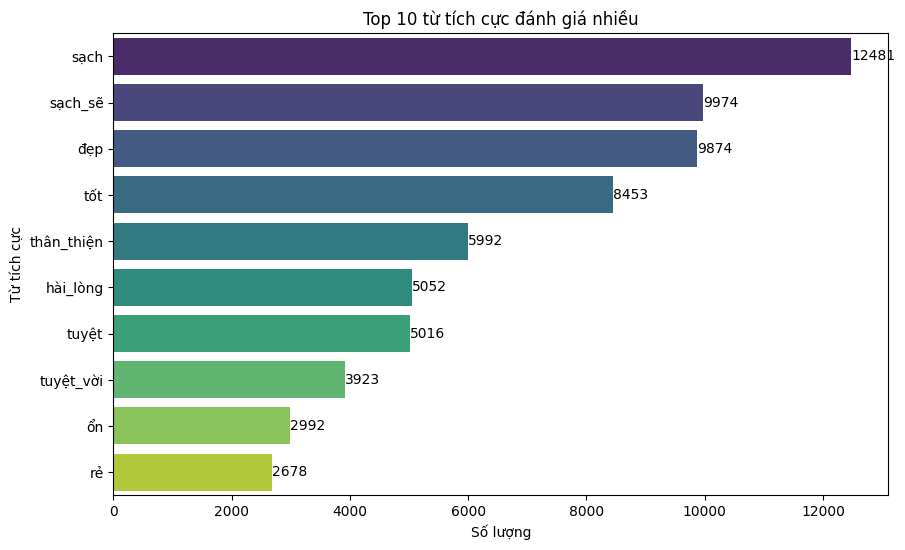

In [ ]:
data['positive_words_str'] = data['positive_words'].apply(lambda x: ','.join(x))

# Gom tất cả các chuỗi lại thành một chuỗi văn bản lớn duy nhất
positive_words_str = data['positive_words_str'].tolist()

#Loại bỏ các ''
filtered_data = list(filter(None, positive_words_str))

#Tách cụm thành các từ riêng lẻ
separated_words = []
for phrase in filtered_data:
    separated_words.extend(phrase.split(','))

# Loại bỏ khoảng trắng thừa và kết hợp lại thành một chuỗi
cleaned_words = [word.strip() for word in separated_words]

#Đếm số lượng từ xuất hiện
word_counts = Counter(cleaned_words)

# Lấy 10 từ xuất hiện nhiều nhất
common_words = word_counts.most_common(10)

# Tạo DataFrame để vẽ biểu đồ
positive_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=positive_words_df, palette='viridis')
# Thêm số lượng trên đỉnh mỗi cột
for index, value in enumerate(positive_words_df['Count']):
    plt.text(value, index, str(value), color='black', ha="left", va="center")
plt.title('Top 10 từ tích cực đánh giá nhiều')
plt.xlabel('Số lượng')
plt.ylabel('Từ tích cực')
plt.show()

### Vẽ biểu đô xem 10 từ negative xuất hiện nhiều

<ipython-input-118-14e6b2c428a7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=negative_words_str, palette='viridis')


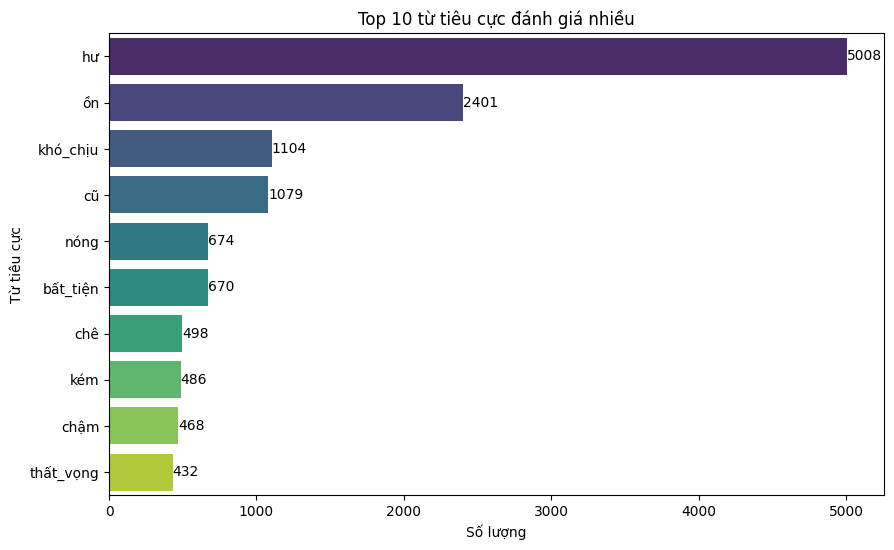

In [ ]:
data['negative_words_str'] = data['negative_words'].apply(lambda x: ','.join(x))

# Gom tất cả các chuỗi lại thành một chuỗi văn bản lớn duy nhất
negative_words_str = data['negative_words_str'].tolist()

#Loại bỏ các ''
filtered_data = list(filter(None, negative_words_str))

#Tách cụm thành các từ riêng lẻ
separated_words = []
for phrase in filtered_data:
    separated_words.extend(phrase.split(','))

# Loại bỏ khoảng trắng thừa và kết hợp lại thành một chuỗi
cleaned_words = [word.strip() for word in separated_words]

#Đếm số lượng từ xuất hiện
word_counts = Counter(cleaned_words)

# Lấy 10 từ xuất hiện nhiều nhất
common_words = word_counts.most_common(10)

# Tạo DataFrame để vẽ biểu đồ
negative_words_str = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=negative_words_str, palette='viridis')
# Thêm số lượng trên đỉnh mỗi cột
for index, value in enumerate(negative_words_str['Count']):
    plt.text(value, index, str(value), color='black', ha="left", va="center")
plt.title('Top 10 từ tiêu cực đánh giá nhiều')
plt.xlabel('Số lượng')
plt.ylabel('Từ tiêu cực')
plt.show()

In [ ]:
data = data.drop(['negative_words_str', 'positive_words_str'], axis=1)
data.head()

,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_remove,positive_words,negative_words,positive_count,negative_count,Tag
0,1_1,Nhật Bản,Cặp đôi,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Tôi đã ở cùng chủ nhân trong 4 đêm. Nhân viên ...,3,2023,7,chủ_nhân đêm . thân_thiện . tầm phòng biển rộn...,"[tuyệt_vời, thú_vị, thân_thiện, cảm_động, tuyệ...",[],6,0,Positive
1,1_1,Việt Nam,Đi công tác,Phòng Deluxe 2 Giường đơn Nhìn ra Biển,10.0,Lựa chọn Mường Thanh vì giá cả phù hợp. Đặt On...,1,2022,9,lựa_chọn mường giá_cả . online ưu_đãi . bữa kh...,[đầy_đủ],"[ồn, hư]",1,2,Neutral
2,1_1,Việt Nam,Cặp đôi,Deluxe Hướng biển giường đôi,9.2,"Lần này đến với Nha Trang, tôi book phòng tại ...",1,2024,6,phòng khách_sạn mường . khách_sạn đường trần_p...,"[sạch_sẽ, sạch, đầy_đủ, niềm_nở]","[cũ, hư, cũ_kỹ, chờ_đợi]",4,4,Neutral
3,1_1,Việt Nam,Gia đình có em bé,Deluxe Hướng biển giường đôi,8.8,Hôm đi đến lúc về thì mọi thứ trong Khách sạn ...,3,2024,6,hôm đi khách_sạn điều_tuyết vời đón tiép nhiệt...,"[phục_vụ, đầy_đủ]",[],2,0,Neutral
4,1_1,Việt Nam,Cặp đôi,Deluxe 2 giường Hướng phố,9.2,Khách sạn có vị trí trung tâm và sát biển. Nhâ...,1,2024,6,khách_sạn vị_trí_tâm sát biển . vẻ thân_thiện ...,"[thích, đẹp, thân_thiện, rộng_rãi, thoáng]","[không_thích, nóng]",5,2,Positive


In [ ]:
data.groupby('Tag').count()

,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_remove,positive_words,negative_words,positive_count,negative_count,Body_pre,Language
Tag,,,,,,,,,,,,,,,,
Negative,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2701,2698,2701
Neutral,13854,13854,13854,13854,13854,13854,13854,13854,13854,13854,13854,13854,13854,13854,13822,13854
Positive,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781


In [ ]:
data = data[['Group Name', 'Room Type', 'Tag', 'Body_pre_fea_remove']]
data.head()

## Chuẩn bị train_data, test_data

### Xử lý imbalance bằng Oversampling

In [ ]:
from sklearn.utils import resample
# Tách riêng các lớp
class_0 = data[data['Tag'] == 'Positive']
class_1 = data[data['Tag'] == 'Neutral']
class_2 = data[data['Tag'] == 'Negative']

# Đếm số lượng mẫu của từng lớp
count_0 = len(class_0)
count_1 = len(class_1)
count_2 = len(class_2)

# Tìm lớp chiếm đa số
max_count = max(count_0, count_1, count_2)

# Resample các lớp
sampled_class_0 = resample(class_0, replace=True, n_samples=max_count, random_state=42)
sampled_class_1 = resample(class_1, replace=True, n_samples=max_count, random_state=42)
sampled_class_2 = resample(class_2, replace=True, n_samples=max_count, random_state=42)

# Kết hợp các lớp lại thành DataFrame mới
final_data = pd.concat([sampled_class_0, sampled_class_1, sampled_class_2])

# Shuffle the dataset
final_data = final_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
final_data.groupby('Tag').count()

,Hotel ID,Nationality,Group Name,Room Type,Score,Body,Stay,year,month,Body_pre_remove,positive_words,negative_words,positive_count,negative_count,Body_pre,Language
Tag,,,,,,,,,,,,,,,,
Negative,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24747,24781
Neutral,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24725,24781
Positive,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781,24781


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data['Body_pre_remove'], final_data['Tag'], test_size=0.3, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
train_X = vectorizer.fit_transform(X_train)
test_X = vectorizer.transform(X_test)

## Xây dựng mô hình

In [ ]:
detree = DecisionTreeClassifier()
start_time = time.time()
detree_model = detree.fit(train_X, y_train)
end_time = time.time()
y_pred_detree = detree_model.predict(test_X)
time_detree = end_time - start_time

In [ ]:
knn = KNeighborsClassifier()
start_time = time.time()
knn_model = knn.fit(train_X, y_train)
end_time = time.time()
y_pred_knn = knn_model.predict(test_X)
time_knn = end_time - start_time

In [ ]:
lg = LogisticRegression()
start_time = time.time()
lg_model = lg.fit(train_X, y_train)
end_time = time.time()
y_pred_lg = lg_model.predict(test_X)
time_lg = end_time - start_time

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
random = RandomForestClassifier()
start_time = time.time()
random_model = random.fit(train_X, y_train)
end_time = time.time()
y_pred_random = random_model.predict(test_X)
time_random = end_time - start_time

## Đánh giá các mô hình

In [ ]:
report_detree = classification_report(y_pred_detree, y_test, digits=4)
print(time_detree)
print(report_detree)

6.32973837852478
              precision    recall  f1-score   support

    Negative     0.9681    0.9773    0.9727      7457
     Neutral     0.9418    0.9549    0.9483      7332
    Positive     0.9649    0.9426    0.9536      7514

    accuracy                         0.9583     22303
   macro avg     0.9582    0.9583    0.9582     22303
weighted avg     0.9584    0.9583    0.9582     22303



In [ ]:
report_knn = classification_report(y_pred_knn, y_test, digits=4)
print(time_knn)
print(report_knn)

0.1188356876373291
              precision    recall  f1-score   support

    Negative     0.9672    0.9636    0.9654      7556
     Neutral     0.9196    0.8058    0.8590      8483
    Positive     0.7758    0.9092    0.8372      6264

    accuracy                         0.8883     22303
   macro avg     0.8875    0.8929    0.8872     22303
weighted avg     0.8953    0.8883    0.8889     22303



In [ ]:
report_lg = classification_report(y_pred_lg, y_test, digits=4)
print(time_lg)
print(report_lg)

6.596776962280273
              precision    recall  f1-score   support

    Negative     0.9190    0.9275    0.9232      7459
     Neutral     0.8035    0.8460    0.8242      7060
    Positive     0.8785    0.8285    0.8528      7784

    accuracy                         0.8671     22303
   macro avg     0.8670    0.8673    0.8667     22303
weighted avg     0.8683    0.8671    0.8673     22303



In [ ]:
report_random = classification_report(y_pred_random, y_test, digits=4)
print(time_random)
print(report_random)

70.31453037261963
              precision    recall  f1-score   support

    Negative     0.9669    0.9829    0.9748      7406
     Neutral     0.9408    0.9605    0.9505      7282
    Positive     0.9744    0.9393    0.9565      7615

    accuracy                         0.9607     22303
   macro avg     0.9607    0.9609    0.9606     22303
weighted avg     0.9609    0.9607    0.9606     22303



## Chọn Decision Tree vì accuracy chênh lệch không đáng kể với Random Forest tương đối tốt và thời gian tốt hơn gấp 10 lần


## Cung cấp các thông tin cho chủ khách sạn

In [ ]:
hotel_profile = pd.read_csv('/content/gdrive/MyDrive/LDS0_k296_NgoTrieuPhu/Projects_1/Data_Agoda_raw/hotel_profiles.csv', encoding="utf-8")
hotel_profile.drop(['num', 'Total Score', 'Vị trí', 'Độ sạch sẽ', 'Dịch vụ', 'Tiện nghi', 'Đáng giá tiền', 'Sự thoải mái và chất lượng phòng'], axis=1, inplace=True)
hotel_profile.head()

,Hotel ID,Hotel Name,Hotel Rank,Hotel Address
0,1_1,Khách sạn Mường Thanh Luxury Nha Trang (Muong Thanh Luxury Nha Trang Hotel),5 sao trên 5,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam"
1,1_2,ALPHA BIRD NHA TRANG,4 sao trên 5,"51/19/37 Tue Tinh St, Loc Tho Ward, Nha Trang, Lộc Thọ, Nha Trang, Việt Nam, 650000"
2,1_3,Khách sạn Aaron (Aaron Hotel),3.5 sao trên 5,"6Trần Quang Khải, Lộc Thọ, Nha Trang, Việt Nam, 65000"
3,1_4,Panorama Star Beach Nha Trang,5 sao trên 5,"02 Nguyen Thi Minh Khai, Lộc Thọ, Nha Trang, Việt Nam, 650000"
4,1_5,Khách sạn Balcony Nha Trang (Balcony Nha Trang Hotel),4 sao trên 5,"98B/13 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam"


In [ ]:
def get_hotel_id(hotel_name):
    # Xử lý các ký tự đặc biệt trong tên khách sạn
    escaped_hotel_name = re.escape(hotel_name)

    # Tìm kiếm hàng phù hợp với tên khách sạn
    match = hotel_profile[hotel_profile['Hotel Name'].str.contains(escaped_hotel_name, case=False, na=False, regex=True)]

    if not match.empty:
        return match['Hotel ID'].values[0]
    else:
        return 'Hotel not found'

In [ ]:
a = 'Khách sạn Mường Thanh Luxury Nha Trang (Muong Thanh Luxury Nha Trang Hotel'
print('     Thông tin tổng quan   ')
hotel_id = get_hotel_id(a)
grouped_mean = data[data['Hotel ID'] == hotel_id]['Score'].mean()
grouped_count = data[data['Hotel ID'] == hotel_id]['Hotel ID'].count()
print('Tổng số lượng đánh giá: ',grouped_count)
print('Điểm số trung bình của khách sạn: ',grouped_mean)

     Thông tin tổng quan   
Tổng số lượng đánh giá:  1115
Điểm số trung bình của khách sạn:  9.38403587443946


In [ ]:
print('-----------------------------------------------')

print('     Phân tích quốc tịch và thời gian lưu trú   ')
score_national = data[data['Hotel ID'] == hotel_id].groupby('Nationality')['Score'].mean()
time_national = data[data['Hotel ID'] == hotel_id].groupby('Nationality')['Stay'].mean()
print('Điểm số trung bình theo quốc tịch: ', score_national)
print('Thời gian lưu trú trung bình: ', time_national)

-----------------------------------------------
     Phân tích quốc tịch và thời gian lưu trú   
Điểm số trung bình theo quốc tịch:  Nationality
Hoa Kỳ         9.550000
Nhật Bản      10.000000
Trung Quốc     9.200000
Việt Nam       9.379209
Name: Score, dtype: float64
Thời gian lưu trú trung bình:  Nationality
Hoa Kỳ        2.437500
Nhật Bản      3.000000
Trung Quốc    1.000000
Việt Nam      1.798528
Name: Stay, dtype: float64


In [ ]:
print('-----------------------------------------------')

print('     Thông tin chi tiết theo loại phòng và nhóm khách')
room_score = data[data['Hotel ID'] == hotel_id].groupby('Room Type')['Score'].mean()
group_score = data[data['Hotel ID'] == hotel_id].groupby('Group Name')['Score'].mean()
print('Phân tích điểm số trung bình theo từng loại phòng: ', room_score.head(4))
print('Phân tích điểm số theo nhóm khách: ', group_score)


-----------------------------------------------
     Thông tin chi tiết theo loại phòng và nhóm khách
Phân tích điểm số trung bình theo từng loại phòng:  Room Type
Deluxe 2 giường Hướng phố       9.540385
Deluxe Hướng biển giường đôi    9.403344
Deluxe giường đôi Hướng phố     9.412935
Executive Suite                 9.032258
Name: Score, dtype: float64
Phân tích điểm số theo nhóm khách:  Group Name
Cặp đôi               9.440323
Du lịch một mình      9.553488
Gia đình có em bé     9.320202
Gia đình có trẻ em    9.377391
Nhóm                  9.365766
Đi công tác           9.481319
Name: Score, dtype: float64


In [ ]:
print('-----------------------------------------------')
filtered_df = data[data['Hotel ID'] == hotel_id]
score_month_year = filtered_df.groupby(['year', 'month'])['Score'].mean().reset_index()
print('     Đánh giá điểm số theo thời gian\n', score_month_year)

-----------------------------------------------
     Đánh giá điểm số theo thời gian
     year  month      Score
0   2020      6   9.200000
1   2020      7   9.600000
2   2020      9  10.000000
3   2021      4   8.000000
4   2022      2   8.200000
5   2022      4   9.600000
6   2022      5   9.781818
7   2022      6  10.000000
8   2022      7   8.400000
9   2022      8  10.000000
10  2022      9  10.000000
11  2022     11   8.400000
12  2022     12  10.000000
13  2023      1   9.397436
14  2023      2   9.866667
15  2023      3   9.485714
16  2023      4   9.500000
17  2023      5   7.600000
18  2023      6   9.433333
19  2023      7   9.502703
20  2023      8  10.000000
21  2023      9  10.000000
22  2023     10   9.492308
23  2023     11  10.000000
24  2023     12   9.629851
25  2024      1   9.612903
26  2024      2   9.386802
27  2024      3   9.000000
28  2024      4   9.040000
29  2024      5   9.500000
30  2024      6   8.992000
31  2024      7   8.500000
